In [14]:
# Bài tập: Viết chương trình tìm cách đưa 3 người và 3 quỷ sang sông!!!

def check(child):
  if child[0]==child[1]:
    return True
  if child[0] == 0 or child[0] == 3:
    return True
  return False

def Children(O):
  ans = []
  # Trường hợp đưa 1 người và 1 quỷ qua sông
  if O[0]>=1 and O[1]>=1:
    child = [4-O[0], 4-O[1],1-O[2]]
    if check(child):
      ans.append(child)
  # Trường hợp đưa 2 người
  if O[0]>=2:
    child = [5-O[0], 3-O[1],1-O[2]]
    if check(child):
      ans.append(child)
  # Trường hợp đưa 2 quỷ qua sông
  if O[1]>=2:
    child = [3-O[0], 5-O[1],1-O[2]]
    if check(child):
      ans.append(child)
  # Trường hợp đưa 1 người
  if O[0]>=1:
    child = [4-O[0], 3-O[1],1-O[2]]
    if check(child):
      ans.append(child)
  # Trường hợp đưa 2 quỷ qua sông
  if O[1]>=1:
    child = [3-O[0], 4-O[1],1-O[2]]
    if check(child):
      ans.append(child)
  return ans

# [Số người ở phía thuyền, Số quỷ ở phía thuyền, vị trí thuyền]
Start = [3,3,0]
Goal = [3,3,1]

# 1. Cho đỉnh xuất phát vào open. 
Open = [(Start,None)]
Closed = []

OK = False

# 2. Nếu open rỗng thì tìm kiếm thất bại, kết thúc việc tìm kiếm.
# 6. Trở lại bước 2.
while len(Open) > 0:
  # 3. Lấy đỉnh đầu trong open ra và gọi đó là ʘ. Cho ʘ vào closed
  O_cha = Open.pop(0)
  O = O_cha[0]
  Closed.append(O)
  # 4. Nếu ʘ là đỉnh đích thì tìm kiếm thành công, kết thúc việc tìm kiếm.
  if O == Goal:
    OK = True
    break
  # 5. Tìm tất cả các đỉnh con của ʘ không thuộc open và closed cho vào cuối của open
  for child in Children(O):
    if child not in Open and child not in Closed:
      Open.append((child,O_cha))

print(OK)
print(O_cha)





True
([3, 3, 1], ([1, 1, 0], ([3, 2, 1], ([0, 3, 0], ([3, 1, 1], ([2, 2, 0], ([2, 2, 1], ([3, 1, 0], ([0, 3, 1], ([3, 2, 0], ([1, 1, 1], ([3, 3, 0], None))))))))))))


In [15]:
import random
from queue import PriorityQueue

def C_0(S):
  n = len(S)
  for i in range(n):
    for j in range(n):
      if S[i][j] == 0:
        return i,j

# O = 0: Up
# O = 1: Down
# O = 2: Left
# O = 3: Right
def move(S,O):
  n = len(S)
  L = [list(x) for x in S]
  i,j = C_0(S)
  if O==0:
    if i<n-1:
      L[i][j] = L[i+1][j]
      L[i+1][j] = 0
      return tuple([tuple(x) for x in L])
    else:
      return None
  if O==1:
    if i>0:
      L[i][j] = L[i-1][j]
      L[i-1][j] = 0
      return tuple([tuple(x) for x in L])
    else:
      return None
  if O==2:
    if j<n-1:
      L[i][j] = L[i][j+1]
      L[i][j+1] = 0
      return tuple([tuple(x) for x in L])
    else:
      return None
  if O==3:
    if j>0:
      L[i][j] = L[i][j-1]
      L[i][j-1] = 0
      return tuple([tuple(x) for x in L])
    else:
      return None 

# số ô sai khác    
def distance(A,B):
  n = len(A)
  ans = 0
  for i in range(n):
    for j in range(n):
      if A[i][j]!=B[i][j]:
        ans +=1
  return ans

# Tính cự ly để tất các ô sai khác đi về vị trí đúng
def distance2(A):
  n = len(A)
  ans = 0
  for i in range(n):
    for j in range(n):
      if A[i][j]!=0:
        ii = (A[i][j] - 1)//n
        jj = (A[i][j] - 1)%n
        ans += abs(i-ii)+abs(j-jj)
  return ans 

Goal = ((1,2,3,4,5),(6,7,8,9,10),(11,12,13,14,15),(16,17,18,19,20),(21,22,23,24,0))
#Goal = ((1,2,3,4),(5,6,7,8),(9,10,11,12),(13,14,15,0))
#Goal = ((1,2,3),(4,5,6),(7,8,0))
Start = Goal
for _ in range(5000):
  O = move(Start,random.randint(0,3))
  if O!=None:
    Start = O
for _ in Start: print(_)

# 1. Cho đỉnh xuất phát vào open. 
Open = PriorityQueue()
Open.put(((0,0),Start,None,None))
Closed = {Start}

OK = False

count=0
# 2. Nếu open rỗng thì tìm kiếm thất bại, kết thúc việc tìm kiếm.
# 6. Trở lại bước 2.
while not Open.empty():
  count+=1
  # 3. Lấy đỉnh đầu trong open ra và gọi đó là ʘ. Cho ʘ vào closed
  O_cha = Open.get()
  O = O_cha[1]
  # 4. Nếu ʘ là đỉnh đích thì tìm kiếm thành công, kết thúc việc tìm kiếm.
  if O == Goal:
    OK = True
    break
  # 5. Tìm tất cả các đỉnh con của ʘ không thuộc open và closed cho vào cuối của open
  for _ in range(4):
    child = move(O,_)
    if child!=None and child not in Closed:
      g = O_cha[0][1]+1
      h = distance2(child)*100
      f = g+h
      Open.put(((f,g),child,_,O_cha))
      Closed.add(child)
print(OK,count)

def Myprint(O_cha):
  if O_cha[2]!=None:
    Myprint(O_cha[3])
    print(O_cha[2])
  for _ in O_cha[1]: print(_)

Myprint(O_cha)




(23, 22, 21, 9, 3)
(13, 16, 7, 12, 1)
(2, 14, 10, 6, 18)
(5, 11, 20, 15, 0)
(19, 8, 4, 17, 24)
True 13353
(23, 22, 21, 9, 3)
(13, 16, 7, 12, 1)
(2, 14, 10, 6, 18)
(5, 11, 20, 15, 0)
(19, 8, 4, 17, 24)
3
(23, 22, 21, 9, 3)
(13, 16, 7, 12, 1)
(2, 14, 10, 6, 18)
(5, 11, 20, 0, 15)
(19, 8, 4, 17, 24)
3
(23, 22, 21, 9, 3)
(13, 16, 7, 12, 1)
(2, 14, 10, 6, 18)
(5, 11, 0, 20, 15)
(19, 8, 4, 17, 24)
0
(23, 22, 21, 9, 3)
(13, 16, 7, 12, 1)
(2, 14, 10, 6, 18)
(5, 11, 4, 20, 15)
(19, 8, 0, 17, 24)
3
(23, 22, 21, 9, 3)
(13, 16, 7, 12, 1)
(2, 14, 10, 6, 18)
(5, 11, 4, 20, 15)
(19, 0, 8, 17, 24)
3
(23, 22, 21, 9, 3)
(13, 16, 7, 12, 1)
(2, 14, 10, 6, 18)
(5, 11, 4, 20, 15)
(0, 19, 8, 17, 24)
1
(23, 22, 21, 9, 3)
(13, 16, 7, 12, 1)
(2, 14, 10, 6, 18)
(0, 11, 4, 20, 15)
(5, 19, 8, 17, 24)
2
(23, 22, 21, 9, 3)
(13, 16, 7, 12, 1)
(2, 14, 10, 6, 18)
(11, 0, 4, 20, 15)
(5, 19, 8, 17, 24)
0
(23, 22, 21, 9, 3)
(13, 16, 7, 12, 1)
(2, 14, 10, 6, 18)
(11, 19, 4, 20, 15)
(5, 0, 8, 17, 24)
2
(23, 22, 21, 9, 3)
(1

In [16]:
import random
from termcolor import colored
from IPython.display import clear_output
import time
# K, k: Vua
# Q, q: Hậu
# R, r: Xe
# B, b: Tượng
# N, n: Mã
# P, p: Tốt
liR = [(1,0),(2,0),(3,0),(4,0),(5,0),(6,0),(7,0)]
liL = [(-1,0),(-2,0),(-3,0),(-4,0),(-5,0),(-6,0),(-7,0)]
liD = [(0,1),(0,2),(0,3),(0,4),(0,5),(0,6),(0,7)]
liU = [(0,-1),(0,-2),(0,-3),(0,-4),(0,-5),(0,-6),(0,-7)]
liRD = [(1,1),(2,2),(3,3),(4,4),(5,5),(6,6),(7,7)]
liLU = [(-1,-1),(-2,-2),(-3,-3),(-4,-4),(-5,-5),(-6,-6),(-7,-7)]
liRU = [(1,-1),(2,-2),(3,-3),(4,-4),(5,-5),(6,-6),(7,-7)]
liLD = [(-1,1),(-2,2),(-3,3),(-4,4),(-5,5),(-6,6),(-7,7)]
liN = [(1,2),(-1,2),(1,-2),(-1,-2),(2,1),(-2,1),(2,-1),(-2,-1)]
liK = [(0,1),(1,0),(0,-1),(-1,0),(1,1),(-1,1),(1,-1),(-1,-1)]

board = [['r','n','b','q','k','b','n','r'],
         ['p','p','p','p','p','p','p','p'],
         ['_','_','_','_','_','_','_','_'],
         ['_','_','_','_','_','_','_','_'],
         ['_','_','_','_','_','_','_','_'],
         ['_','_','_','_','_','_','_','_'],
         ['P','P','P','P','P','P','P','P'],
         ['R','N','B','Q','K','B','N','R']]

# kiểm tra có thể đi được hay không (Xe, Tượng, Hậu)
def Go(x,y,l,isContinue=False,canFight=True,needFight=False):
  li = []
  for dx,dy in l:
    x1 = x+dx
    y1 = y+dy
    if x1<0 or x1>=8 or y1<0 or y1>=8: 
      if not isContinue: 
        break 
      else: 
        continue
    if board[y1][x1] != '_':
      if canFight and board[y][x].islower() != board[y1][x1].islower():
        li.append((x1,y1))
      if not isContinue: break 
      else: continue
    if not needFight:
      li.append((x1,y1))
  return li


# các nước có thể đi của quân Xe
def Rr(x,y):
  return Go(x,y,liR) + Go(x,y,liL) + Go(x,y,liU) + Go(x,y,liD)

# các nước có thể đi của quân Tượng
def Bb(x,y):
  return Go(x,y,liRD) + Go(x,y,liLU) + Go(x,y,liRU) + Go(x,y,liLD)

# các nước có thể đi của quân Hậu
def Qq(x,y):
  return Rr(x,y) + Bb(x,y)

# các nước có thể đi của quân Mã
def Nn(x,y):
  return Go(x,y,liN,isContinue=True)

# các nước có thể đi của quân Vua
def Kk(x,y):
  return Go(x,y,liK,isContinue=True)

# các nước có thể đi của quân Tốt
def Pp(x,y):
  li = []
  dx = 1
  if not board[y][x].islower():
    dx = -1
  # nước có thể đi
  if y==1 or y==6:
    li = li + Go(x,y,[(0,dx),(0,2*dx)],canFight=False)
  else:
    li = li + Go(x,y,[(0,dx)], canFight=False)
  # nước có thể ăn (tốt ăn chéo)
  li = li + Go(x,y,[(-1,dx),(1,dx)],needFight=True)
  return li

# x, y là tọa độ quân cờ
# islower lượt của quân thường (True) hay quân hoa (False)
# return danh sách tọa độ các nước có thể di chuyển tới
def CanGo(x,y,islower):
  if board[y][x].islower() != islower:
    return []
  if (board[y][x] in "Rr"):
    return Rr(x,y)
  if (board[y][x] in "Nn"):
   return Nn(x,y)
  if (board[y][x] in "Bb"):
    return Bb(x,y)
  if (board[y][x] in "Qq"):
    return Qq(x,y)
  if (board[y][x] in "Kk"):
    return Kk(x,y)
  if (board[y][x] in "Pp"):
    return Pp(x,y)
  return []


def isFinish(board):
  U = False
  L = False
  for _ in board:
    U = U or ('K' in _)
    L = L or ('k' in _)
  return not (U and L)

# return tất cả các nước có thể di chuyển (y,x) -> (y1,x1)
def CanGoList(board,islower):
  li = []
  for y in range(8):
    for x in range(8):
      l = CanGo(x,y,islower)
      for x1,y1 in l:
        li = li + [(y,x,y1,x1)]
  return li

def CPURandomTurn(board,islower):
  #######################################################
  #  Có thể bỏ time.sleep(1) để xem kết quả nhanh hơn   #
  ####################################################### 
  #time.sleep(1)
  li = CanGoList(board,islower)
  return random.choice(li)

def CPUMiniMaxTurn(board,islower,depth = 2):
  #######################################################
  #  Nên dùng Minimax với độ sâu từ 2 đến 4             #
  #######################################################
  li = CanGoList(board,islower)
  Max = -1000
  for y,x,y1,x1 in CanGoList(board,islower):
    child = [_[:] for _ in board]
    child[y1][x1] = child[y][x]
    child[y][x] = '_'
    vl = Minimax(child,depth-1,islower,not islower)
    if Max < vl or (Max == vl and random.choice([0,1])==0):
      Max = vl
      r = (y,x,y1,x1)
  return r

# Board: Bàn cờ hiện tại
# islower: lượt của quân viết thường (True) hay quân viết hoa (False)
# return: giá trị của bàn cờ đối với quân viết thường
def value(board,islower):
  vl = 0
  ######################################################
  #  Cần định nghĩa lại hàm value                      #
  #  Gợi ý:                                            #
  #       1. Hiệu số quân cờ 2 bên                     #
  #       2. Vị trí quân cờ trên bàn cờ                #
  #       3. Tùy suy nghĩ của các em                   #
  ######################################################
  return vl

# node là node hiện tại
# depth là độ sâu
# Pmax là player cần tìm Max
# Pnow là player hiện tại
def Minimax(node,depth,Pmax,Pnow):
  if isFinish(node) or depth ==0:
    return value(node,Pmax)
  if Pmax == Pnow:
    Max = -1000
    for y,x,y1,x1 in CanGoList(node,Pnow):
      child = [_[:] for _ in node]
      child[y1][x1] = child[y][x]
      child[y][x] = '_'
      Max = max(Max,Minimax(child,depth-1,Pmax,not Pnow))
    return Max
  else:
    Min = 1000
    for y,x,y1,x1 in CanGoList(node,Pnow):
      child = [_[:] for _ in node]
      child[y1][x1] = child[y][x]
      child[y][x] = '_'
      Min = min(Min,Minimax(child,depth-1,Pmax,not Pnow))
    return Min


def printBoard(board):
  print("+",*range(8),"+")

  for i in range(8):
    print(i,end=" ")
    for j in range(8):
      if board[i][j] == '_':
        print(board[i][j],end=" ")
      elif board[i][j].islower():
        print(colored(board[i][j],'red'),end=" ")
      else:
        print(colored(board[i][j],'blue'),end=" ")
    print(i,) 

  print("+",*range(8),"+")
  print()

Random = True
MiniMax = False
Now = Random

while not isFinish(board):
  clear_output()
  printBoard(board)
  print("----",Now,"turn","----")
  if Now == MiniMax:
    y,x,y1,x1 = CPUMiniMaxTurn(board,MiniMax)
    board[y1][x1] = board[y][x]
    board[y][x] = '_'
    Now = Random
    print(y,x,y1,x1)
  else:
    y,x,y1,x1 = CPURandomTurn(board,Random)
    board[y1][x1] = board[y][x]
    board[y][x] = '_'
    print(y,x,y1,x1)
    Now = MiniMax

printBoard(board)
if Now:
  print("Minimax Won")
else:
  print("Random Won")

+ 0 1 2 3 4 5 6 7 +
0 r _ _ _ k r _ _ 0
1 _ b _ p _ _ _ p 1
2 n _ p _ _ p _ _ 2
3 p p q _ p _ p _ 3
4 _ _ _ _ _ _ n _ 4
5 N _ _ _ _ _ P N 5
6 P P P K P P B P 6
7 R _ b Q _ _ _ R 7
+ 0 1 2 3 4 5 6 7 +

---- True turn ----
7 2 6 3
+ 0 1 2 3 4 5 6 7 +
0 r _ _ _ k r _ _ 0
1 _ b _ p _ _ _ p 1
2 n _ p _ _ p _ _ 2
3 p p q _ p _ p _ 3
4 _ _ _ _ _ _ n _ 4
5 N _ _ _ _ _ P N 5
6 P P P b P P B P 6
7 R _ _ Q _ _ _ R 7
+ 0 1 2 3 4 5 6 7 +

Random Won


In [17]:
#Hãy viết chương trình cờ Tic-Tac-toe

In [18]:
import random as rd
FoodName=["Tao","Cherry","Cam","Quyt","Duahau","Chanh","Kiwi","Nho","DuaLuoi","DaoTien","Chuoi","DauTay","Thom","Le","SuaBo","CaChua","CaRot","CaTim","HanhTay","Toi","KhoaiTay","Nam","BanhMy","PhoMai","Bia","Ngheu","Cua","Ca","Tom","Ga","Bo","Trung"]
Food=[[0,0,1,1,0,0,0,0,0,0],[0,0,1,0,0,0,1,1,0,0],[0,0,1,0,0,0,0,0,1,1],[0,0,1,1,1,0,0,0,0,1],
			[0,0,1,0,0,0,0,1,0,0],[0,0,0,1,0,0,1,0,0,1],[0,0,1,1,1,0,0,1,0,1],[0,0,1,0,0,1,0,0,0,0],
			[0,0,0,0,0,1,1,0,1,0],[0,0,1,1,0,1,0,0,0,0],[0,0,1,0,0,1,0,0,0,1],[0,0,1,1,0,0,1,0,0,1],
			[0,0,1,0,0,0,0,0,1,0],[0,0,1,0,0,0,0,0,0,0],[1,1,1,0,1,1,0,1,0,0],[0,0,1,0,0,1,0,1,0,1],
			[0,0,1,1,0,0,1,1,0,0],[0,0,0,0,0,0,0,1,0,0],[0,0,1,0,1,1,0,0,0,0],[1,0,0,1,0,0,1,0,1,1],
			[0,0,1,0,0,0,0,0,0,1],[0,0,1,1,0,0,0,0,0,0],[1,1,1,0,0,0,0,0,0,0],[1,1,0,0,1,1,0,0,0,0],
			[0,0,1,0,0,0,0,0,0,0],[1,0,0,0,1,1,0,0,1,0],[1,0,0,0,1,1,0,0,0,0],[1,1,0,0,0,0,0,0,1,0],
			[1,0,0,0,1,0,1,0,0,0],[1,0,0,0,0,1,0,1,0,0],[1,1,0,0,0,1,0,0,0,0],[1,1,0,0,1,1,0,1,0,0]]
	
FoodValue=[31,66,55,70,34,50,106,38,
			62,49,55,82,33,13,118,54,
			83,15,56,123,32,40,52,63,
			18,74,49,62,64,55,70,100]

n = 100
ng = []
f = [0]*n

def KhoiTao():
  global n,ng
  ng = [[rd.randint(0,1) for _ in range(32)] for __ in range(n)]

def DanhGia():
  global n,ng,f
  for i in range(n):
    tien = 0
    for j in range(32):
      tien += FoodValue[j]*ng[i][j]

    dinhduong = 0
    for k in range(10):
      co = False
      for j in range(32):
        if ng[i][j]==1 and Food[j][k]==1:
          co = True
      if co:
        dinhduong += 1 
    f[i] = tien - 50*dinhduong
    if ng[i][24]==0:
      f[i] += 500
    if ng[i][17]==1:
      f[i] += 500
    if (ng[i][28]==1 and ng[i][30]==1) or (ng[i][28]==0 and ng[i][30]==0):
      f[i] +=500
    

def InNghiem():
  global n,ng,f
  fc = [_ for _ in f]
  fc.sort()
  best = fc[0]
  for i in range(n):
    if f[i]==best:
      tien = 0

      for j in range(32):
        tien += FoodValue[j]*ng[i][j]

      dinhduong = 0
      for k in range(10):
        co = False
        for j in range(32):
          if ng[i][j]==1 and Food[j][k]==1:
            co = True
        if co:
          dinhduong += 1 
      for j in range(32):
        if ng[i][j]==1:
          print(FoodName[j],end=",")
      print(tien,dinhduong)
      break

def LuaChon():
  global n,ng,f
  fc = [_ for _ in f]
  fc.sort()
  nguong = fc[80*n//100]
  for i in range(n):
    if f[i]>nguong:
      ng[i] = [_ for _ in ng[rd.randint(0,n-1)]]

def LaiGhep():
  for _ in range(30*n//100):
    cha = rd.randint(0,n-1)
    me = rd.randint(0,n-1)
    for i in range(32):
      if rd.randint(0,1)==0:
        ng[cha][i],ng[me][i] = ng[me][i],ng[cha][i]

def DotBien():
  i = rd.randint(0,n-1)
  vt = rd.randint(0,31)
  ng[i][vt] = 1 - ng[i][vt]

KhoiTao()
for _ in range(100):
  DanhGia()
  InNghiem()
  LuaChon()
  LaiGhep()
  DotBien()
    

Tao,Cam,Quyt,DuaLuoi,Chuoi,DauTay,Thom,Le,CaChua,Nam,Bia,Ngheu,Ca,Tom,713 10
Quyt,Chanh,DaoTien,DauTay,Le,Toi,KhoaiTay,Bia,Ngheu,Ca,Ga,Bo,Trung,798 10
Cam,Duahau,Chanh,Kiwi,Nho,DuaLuoi,DaoTien,Le,CaRot,HanhTay,KhoaiTay,Nam,BanhMy,Bia,Bo,758 10
Cherry,Cam,Chanh,Kiwi,Chuoi,DauTay,Le,CaRot,HanhTay,KhoaiTay,Bia,Ca,Tom,742 10
Tao,Duahau,DaoTien,DauTay,CaChua,CaRot,HanhTay,KhoaiTay,PhoMai,Bia,Cua,Ca,Bo,Trung,783 10
Kiwi,Nho,Chuoi,DauTay,CaChua,Bia,Ngheu,Cua,Tom,540 9
Cherry,Chanh,Chuoi,DauTay,Le,Nam,PhoMai,Bia,Ngheu,Cua,Tom,574 10
Cherry,Chanh,Chuoi,DauTay,Le,Nam,PhoMai,Bia,Ngheu,Cua,Tom,574 10
Cherry,Chanh,Chuoi,DauTay,Le,Nam,PhoMai,Bia,Ngheu,Cua,Tom,574 10
Tao,Cherry,DuaLuoi,Chuoi,CaChua,HanhTay,Bia,Cua,Tom,Trung,555 10
Chanh,DaoTien,Chuoi,Thom,Toi,KhoaiTay,Nam,BanhMy,Bia,Tom,Ga,571 10
Cherry,Nho,DaoTien,DauTay,Thom,Bia,Ngheu,Ca,Tom,486 10
Duahau,Chanh,Nho,Chuoi,Le,CaChua,BanhMy,Bia,Cua,Tom,427 9
Cherry,Nho,DaoTien,DauTay,Thom,Bia,Ngheu,Ca,Tom,486 10
Cherry,Nho,DaoTien,DauTay,Thom,Bia,Nghe

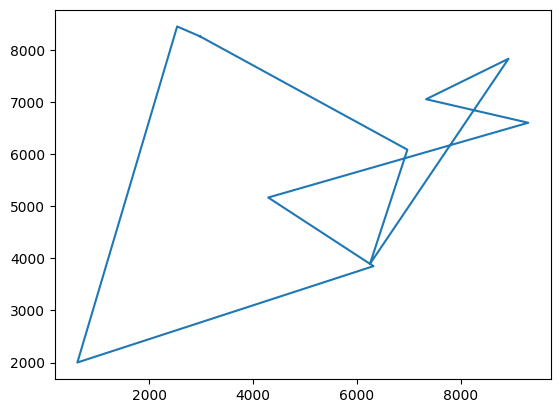

In [19]:
import random as rd
import matplotlib.pyplot as plt

def myplot(n,CityPos,a):
  X = [0]*len(a)
  Y = [0]*len(a)
  for i in range(len(a)):
    X[i] = CityPos[a[i]][0]
    Y[i] = CityPos[a[i]][1]
  plt.plot(X,Y)

# Cho tọa độ 100 thành phố ngẫu nhiên, hãy tìm chu trình ngắn nhất đi qua mỗi thành phố đúng 1 lần 
n = 10
CityPos = [(rd.randint(0,10000),rd.randint(0,10000)) for _ in range(n)]

a = list(range(n))
rd.shuffle(a)
a = a + a[0:1]
myplot(n,CityPos,a)




In [20]:
import random as rd
import operator

D = [(0,4),(0,3),(2,0),(4,1)]

def distance(x,y):
  sum = 0
  for i in range(len(x)):
    sum += (x[i] - y[i])**2
  return sum


def argmin(x,mu):
  r = 0
  dis = -1
  for i in range(len(mu)):
    d = distance(x,mu[i])
    if dis==-1 or dis > d:
      r = i
      dis = d
  return r
print(D)
def kmeans(D,k):
  # bước 1: Chọn ngẫu nhiên k phần tử trong dữ liệu D để làm k trọng tâm
  mu = rd.sample(D,k)
  n = len(D)
  label = [0]*n
  while True:
    c = [(0,0,0)]*k
    sl = [0]*k
    # bước 2: Gán dữ liệu vào nhóm có trọng tâm gần nhất
    cothaydoi = False
    for i in range(n):
      newlabel = argmin(D[i],mu)
      if label[i]!=newlabel:
        label[i]=newlabel
        cothaydoi = True
    if not cothaydoi:
      break
    # bước 3: Tính lại trọng tâm của từng nhóm
    for i in range(n):
      c[label[i]] = tuple(map(operator.add, c[label[i]], D[i]))
      sl[label[i]] += 1
    for i in range(k):
      if sl[i]!=0:
        c[i] = tuple(map(operator.floordiv, c[i], [sl[i] for _ in range(len(c[i]))])) 
      else:
        c[i] = rd.sample(D,1)
    mu = c[:]
    # bước 4: Quay lại bước 2 nếu có thay đổi.
  return mu,label

print(kmeans(D,2))

[(0, 4), (0, 3), (2, 0), (4, 1)]
([(3, 0), (0, 3)], [1, 1, 0, 0])


In [21]:
#load anh
from PIL import Image
import requests
import numpy as np

#url = "https://i1-thethao.vnecdn.net/2022/05/09/linh-10-jpeg-1652030997-9078-1652031029.jpg?w=220&h=132&q=100&dpr=1&fit=crop&s=O3tA9lV6hHeIDom-jHabuQ"
#url = "https://i1-vnexpress.vnecdn.net/2022/05/09/DSC00957-JPG-1443-1652048578.jpg?w=680&h=0&q=100&dpr=1&fit=crop&s=27j3789E4IWIkZ0WTIaw2Q"
url = "https://bloganh.net/wp-content/uploads/2021/03/chup-anh-dep-anh-sang-min.jpg"
im = Image.open(requests.get(url, stream=True).raw)
width, height = im.size
pix_val = list(im.getdata())
pix_val_sample = rd.sample(pix_val,5000)
mu,label = kmeans(pix_val_sample,11)

new_pix_val = [mu[argmin(pix_val[i],mu)] for i in range(len(pix_val))]
new_pix_val = np.array(new_pix_val,np.uint8)
array = np.reshape(new_pix_val, (height,width,3))
img = Image.fromarray(array)
img.save('new.png')


In [22]:
# black box
def f(x):
  return ((x-2)**2)*((x-4)**2)

In [23]:
import random as rd
def f1(x):
  d = 0.000000001
  return (f(x+d) - f(x))/d

def main():
  alpha = 1.0
  x = rd.randint(-1000,1000)
  for i in range(100):
    x_new = x - alpha*f1(x)
    if f(x_new)>f(x):
      alpha/=2
    elif f(x_new)<f(x):
      alpha *=2
      x = x_new
    else:
      break
  print(x,f(x))

main()


1.9999999995000013 9.999948369168855e-19


In [24]:
data =[[22,28,146,34],
[36,46,169,57],
[24,39,160,48],
[22,25,156,38],
[27,34,161,47],
[29,29,168,50],
[26,38,154,54],
[23,23,153,40],
[31,42,160,62],
[24,27,152,39],
[23,35,155,46],
[27,39,154,54],
[31,38,157,57],
[25,32,162,53],
[23,25,142,32]]

def y(a,x):
  return a[0] + a[1]*x[1] + a[2]*x[2] + a[3]*x[3]

def e(a):
  s = 0
  for x in data:
    s += (x[0] - y(a,x))**2
  return s

def e1(a,i):
  d = 0.00000001
  aa = a[:]
  aa[i] = a[i]+d
  return (e(aa)-e(a))/d

def main():
  alpha = 1.0
  a = [1,1,1,1]
  print(a)
  for i in range(1000):
    a_new = a[:]
    for i in range(len(a)):
      a_new[i] = a[i] - alpha*e1(a,i)

    if e(a_new)>e(a):
      alpha/=2
    elif e(a_new)<e(a):
      alpha *=2
      a = a_new
    else:
      break 
  for _ in a:
    print(_,end="\t")

main()

[1, 1, 1, 1]
0.9947865619691089	0.29548465191361234	0.05427437668723606	0.1441648208558236	

In [25]:
from sklearn import datasets
import math

iris = datasets.load_iris()
X = iris.data
YY = iris.target

def o(W,x):
  sum = W[0];
  for i in range(len(x)):
    sum+=W[i+1]*x[i]
  return math.exp(sum)/(1+math.exp(sum))

def e(W,x,y):
  return (y-o(W,x))**2

def E(W,X,Y):
  sum = 0
  for i in range(len(X)):
    sum += e(W,X[i],Y[i])
  return sum

def E1(W,X,Y,i):
  d = 0.00000001
  WW = W[:]
  WW[i] = WW[i]+d
  return (E(WW,X,Y)-E(W,X,Y))/d

def Model(X,Y):
  alpha = 1.0
  W = [0]*(len(X[0])+1)
  for _ in range(100):
    W_new = W[:]
    for i in range(len(W)):
      W_new[i] = W[i] - alpha*E1(W,X,Y,i)
    E_new = E(W_new,X,Y)
    E_ = E(W,X,Y)
    if E_new>E_:
      alpha/=2
    elif E_new<E_:
      alpha *=2
      W = W_new
    else:
      break 
  return W  

model = [None] * 3
for i in range(3):
  Y = list(YY)[:]
  for j in range(len(Y)):
    if Y[j] == i:
      Y[j] = 1
    else:
      Y[j] = 0
  model[i] = Model(X,Y)

def argmax(f):
  max = f[0]
  maxi = 0
  for i in range(len(f)):
    if max<f[i]:
      max = f[i]
      maxi = i
  return maxi

for i in range(len(X)):
  print(YY[i],argmax([o(model[_],X[i]) for _ in range(3)]))

  


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 2
1 2
1 2
1 2
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 1
1 2
1 2
1 2
1 1
1 1
1 1
1 1
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 1
1 1
1 2
1 2
1 2
1 1
1 1
1 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


In [26]:
from sklearn import datasets
import math

iris = datasets.load_iris()
X = iris.data
Y = iris.target

def o(W,x):
  sum = W[0];
  for i in range(len(x)):
    sum+=W[i+1]*x[i]
  return math.exp(sum)/(1+math.exp(sum))

def e(WW,x,y):
  Y = [0]*len(WW)
  Y[y] = 1
  sum = 0
  for i in range(len(WW)):
    sum += (Y[i]-o(WW[i],x))**2
  return sum

def E(WW,X,Y):
  sum = 0
  for i in range(len(X)):
    sum += e(WW,X[i],Y[i])
  return sum

def E1(WW,X,Y,j,i):
  d = 0.00000001
  W_ = [W[:] for W in WW]
  W_[j][i] = WW[j][i]+d
  return (E(W_,X,Y)-E(WW,X,Y))/d

def Model(X,Y):
  alpha = 1.0
  WW = [[0]*(len(X[0])+1)]*3
  for _ in range(100):
    W_new = [W[:] for W in WW]
    for j in range(3):
      for i in range(len(WW[j])):
        W_new[j][i] = WW[j][i] - alpha*E1(WW,X,Y,j,i)
    E_new = E(W_new,X,Y)
    E_ = E(WW,X,Y)
    if E_new>E_:
      alpha/=2
    elif E_new<E_:
      alpha *=2
      WW = W_new
    else:
      break 
  return WW  

model = Model(X,list(Y))

def argmax(f):
  max = f[0]
  maxi = 0
  for i in range(len(f)):
    if max<f[i]:
      max = f[i]
      maxi = i
  return maxi

for i in range(len(X)):
  print(YY[i],argmax([o(model[_],X[i]) for _ in range(3)]))

  


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 2
1 2
1 2
1 2
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 1
1 1
1 2
1 2
1 1
1 1
1 1
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 1
1 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
